In [13]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('/home/ubuntu/workspace/BBNI.JK.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,8275.0,8300.0,8125.0,8275.0,7932.867676,25268600
1,2022-06-16,8400.0,8475.0,8250.0,8250.0,7908.901367,35080500
2,2022-06-17,8125.0,8250.0,8100.0,8175.0,7837.001953,42844900
3,2022-06-20,8200.0,8225.0,8050.0,8125.0,7789.069336,27255800
4,2022-06-21,8175.0,8450.0,8175.0,8450.0,8100.632324,27525700
...,...,...,...,...,...,...,...
242,2023-06-08,9150.0,9200.0,9075.0,9200.0,9200.000000,17161200
243,2023-06-09,9200.0,9225.0,9150.0,9225.0,9225.000000,17931900
244,2023-06-12,9250.0,9300.0,9175.0,9300.0,9300.000000,17173600
245,2023-06-13,9300.0,9300.0,9100.0,9125.0,9125.000000,20095000


In [14]:
databersih = data.dropna()
databersih

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,8275.0,8300.0,8125.0,8275.0,7932.867676,25268600
1,2022-06-16,8400.0,8475.0,8250.0,8250.0,7908.901367,35080500
2,2022-06-17,8125.0,8250.0,8100.0,8175.0,7837.001953,42844900
3,2022-06-20,8200.0,8225.0,8050.0,8125.0,7789.069336,27255800
4,2022-06-21,8175.0,8450.0,8175.0,8450.0,8100.632324,27525700
...,...,...,...,...,...,...,...
242,2023-06-08,9150.0,9200.0,9075.0,9200.0,9200.000000,17161200
243,2023-06-09,9200.0,9225.0,9150.0,9225.0,9225.000000,17931900
244,2023-06-12,9250.0,9300.0,9175.0,9300.0,9300.000000,17173600
245,2023-06-13,9300.0,9300.0,9100.0,9125.0,9125.000000,20095000


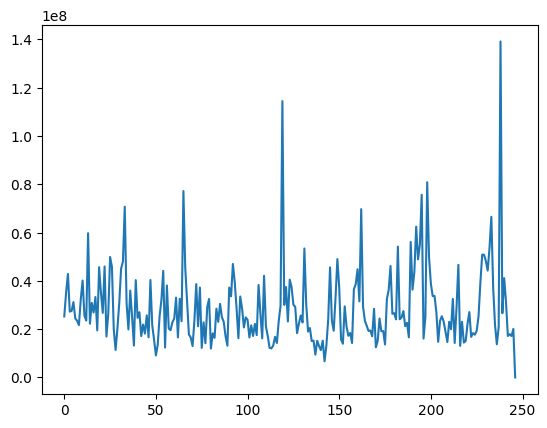

In [15]:
import matplotlib.pyplot as plt
df.plot(x="Date", y="Volume")
plt.show()

In [16]:
temp=databersih["Close"]
temp

0      8275.0
1      8250.0
2      8175.0
3      8125.0
4      8450.0
        ...  
242    9200.0
243    9225.0
244    9300.0
245    9125.0
246    8975.0
Name: Close, Length: 247, dtype: float64

In [17]:

temp.describe()

count     247.000000
mean     8888.056680
std       563.871696
min      7225.000000
25%      8662.500000
50%      9000.000000
75%      9300.000000
max      9900.000000
Name: Close, dtype: float64

In [18]:
n = len(temp)
sizeTrain = (round(n*0.8))
data_train = pd.DataFrame(temp[:sizeTrain])
data_test = pd.DataFrame(temp[sizeTrain:])
data_train

,Close
0,8275.0
1,8250.0
2,8175.0
3,8125.0
4,8450.0
...,...
193,8800.0
194,8950.0
195,9025.0
196,9000.0


In [19]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_train)
scaled_train = pd.DataFrame(scaled)
scaled_train

,0
0,0.392523
1,0.383178
2,0.355140
3,0.336449
4,0.457944
...,...
193,0.588785
194,0.644860
195,0.672897
196,0.663551


In [20]:
scaled = scaler.fit_transform(data_test)
scaled_test = pd.DataFrame(scaled)
scaled_test

,0
0,1.000000
1,0.857143
2,0.314286
3,0.514286
4,0.685714
5,0.685714
6,0.685714
7,0.685714
8,0.657143
9,0.714286


In [21]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [22]:
# transform to a supervised learning problem
X, y = split_sequence(scaled_train[0], 3)
print(X.shape, y.shape)
dfX = pd.DataFrame(X, columns=["Xt-3","Xt-2", "Xt-1"])
dfy = pd.DataFrame(y, columns=["Xt"])

df = pd.concat((dfX, dfy), axis = 1)
df

(195, 3) (195,)


,Xt-3,Xt-2,Xt-1,Xt
0,0.392523,0.383178,0.355140,0.336449
1,0.383178,0.355140,0.336449,0.457944
2,0.355140,0.336449,0.457944,0.345794
3,0.336449,0.457944,0.345794,0.345794
4,0.457944,0.345794,0.345794,0.345794
...,...,...,...,...
190,0.672897,0.663551,0.579439,0.588785
191,0.663551,0.579439,0.588785,0.644860
192,0.579439,0.588785,0.644860,0.672897
193,0.588785,0.644860,0.672897,0.663551


In [23]:
# ambil data
X_train = df.drop(columns="Xt")
y_train = df.Xt
y_train
     

0      0.336449
1      0.457944
2      0.345794
3      0.345794
4      0.345794
         ...   
190    0.588785
191    0.644860
192    0.672897
193    0.663551
194    0.747664
Name: Xt, Length: 195, dtype: float64

In [24]:
# transform to a supervised learning problem
X, y = split_sequence(scaled_test[0], 3)
print(X.shape, y.shape)
dfX = pd.DataFrame(X, columns=["Xt-3","Xt-2", "Xt-1"])
dfy = pd.DataFrame(y, columns=["Xt"])

df_test = pd.concat((dfX, dfy), axis = 1)
df_test

(46, 3) (46,)


,Xt-3,Xt-2,Xt-1,Xt
0,1.000000,0.857143,0.314286,0.514286
1,0.857143,0.314286,0.514286,0.685714
2,0.314286,0.514286,0.685714,0.685714
3,0.514286,0.685714,0.685714,0.685714
4,0.685714,0.685714,0.685714,0.685714
5,0.685714,0.685714,0.685714,0.657143
6,0.685714,0.685714,0.657143,0.714286
7,0.685714,0.657143,0.714286,0.657143
8,0.657143,0.714286,0.657143,0.714286
9,0.714286,0.657143,0.714286,0.685714


In [25]:
# ambil data
X_test = df_test.drop(columns="Xt")
y_test = df_test.Xt
X_test

,Xt-3,Xt-2,Xt-1
0,1.000000,0.857143,0.314286
1,0.857143,0.314286,0.514286
2,0.314286,0.514286,0.685714
3,0.514286,0.685714,0.685714
4,0.685714,0.685714,0.685714
5,0.685714,0.685714,0.685714
6,0.685714,0.685714,0.657143
7,0.685714,0.657143,0.714286
8,0.657143,0.714286,0.657143
9,0.714286,0.657143,0.714286


KNN

In [28]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
modelknn = neigh.fit(X_train, y_train)

In [29]:
y_pred = neigh.predict(X_test)
y_actual = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
y_prediksi = scaler.inverse_transform(y_pred.reshape(-1, 1))
print(y_actual)
print(y_prediksi)

[[9200.]
 [9350.]
 [9350.]
 [9350.]
 [9350.]
 [9325.]
 [9375.]
 [9325.]
 [9375.]
 [9350.]
 [9375.]
 [9400.]
 [9450.]
 [9475.]
 [9575.]
 [9500.]
 [9425.]
 [9550.]
 [9475.]
 [9300.]
 [9250.]
 [9150.]
 [9125.]
 [9200.]
 [9150.]
 [9000.]
 [8900.]
 [8750.]
 [8750.]
 [8825.]
 [8850.]
 [8950.]
 [8825.]
 [9000.]
 [8950.]
 [9050.]
 [9025.]
 [9050.]
 [9000.]
 [9200.]
 [9150.]
 [9200.]
 [9225.]
 [9300.]
 [9125.]
 [8975.]]
[[9314.25233645]
 [9260.28037383]
 [9246.37850467]
 [9342.87383178]
 [9358.41121495]
 [9358.41121495]
 [9341.23831776]
 [9347.78037383]
 [9353.5046729 ]
 [9360.86448598]
 [9363.31775701]
 [9385.39719626]
 [9422.19626168]
 [9420.56074766]
 [9467.99065421]
 [9507.24299065]
 [9503.97196262]
 [9460.63084112]
 [9490.07009346]
 [9467.1728972 ]
 [9384.57943925]
 [9304.43925234]
 [9223.48130841]
 [9171.14485981]
 [9213.6682243 ]
 [9196.4953271 ]
 [9091.0046729 ]
 [9019.04205607]
 [8856.30841121]
 [8818.69158879]
 [8821.96261682]
 [8821.96261682]
 [8893.10747664]
 [8872.6635514 ]
 [8920.

In [30]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_prediksi, y_actual)
print(mape)

0.008413577680112127


In [31]:
import pickle
# save the model to disk
filename = 'model_knn.sav'
pickle.dump(neigh, open(filename, 'wb'))

SVM

In [32]:
from sklearn import svm

regr = svm.SVR()
regr.fit(X_train, y_train)

SVR()

In [33]:
y_pred2 = regr.predict(X_test)
y_actual = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
y_prediksi2 = scaler.inverse_transform(y_pred2.reshape(-1, 1))
print(y_actual)
print(y_prediksi2)

[[9200.]
 [9350.]
 [9350.]
 [9350.]
 [9350.]
 [9325.]
 [9375.]
 [9325.]
 [9375.]
 [9350.]
 [9375.]
 [9400.]
 [9450.]
 [9475.]
 [9575.]
 [9500.]
 [9425.]
 [9550.]
 [9475.]
 [9300.]
 [9250.]
 [9150.]
 [9125.]
 [9200.]
 [9150.]
 [9000.]
 [8900.]
 [8750.]
 [8750.]
 [8825.]
 [8850.]
 [8950.]
 [8825.]
 [9000.]
 [8950.]
 [9050.]
 [9025.]
 [9050.]
 [9000.]
 [9200.]
 [9150.]
 [9200.]
 [9225.]
 [9300.]
 [9125.]
 [8975.]]
[[9158.38248015]
 [9140.2853174 ]
 [9271.30449856]
 [9382.59412393]
 [9366.39869712]
 [9366.39869712]
 [9338.54936783]
 [9382.03594899]
 [9352.34215702]
 [9376.08912086]
 [9379.73505273]
 [9387.46689148]
 [9426.33996875]
 [9473.61043423]
 [9499.94638564]
 [9534.40157331]
 [9503.30779621]
 [9449.09475317]
 [9520.84569584]
 [9490.86503747]
 [9309.84611402]
 [9208.8753749 ]
 [9151.83126339]
 [9120.71537886]
 [9160.5178617 ]
 [9162.06444925]
 [9090.89274404]
 [9039.76798098]
 [8919.0548005 ]
 [8866.98677772]
 [8872.20574808]
 [8864.54330431]
 [8891.22963021]
 [8880.33603973]
 [8943.

In [34]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_prediksi2, y_actual)
print(mape)

0.008140374615039357


In [35]:
# save the model to disk
filename = 'model_svm.sav'
pickle.dump(regr, open(filename, 'wb'))

Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [37]:
y_pred3 = dt.predict(X_test)
y_actual = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
y_prediksi3 = scaler.inverse_transform(y_pred3.reshape(-1, 1))
print(y_actual)
print(y_prediksi3)

[[9200.]
 [9350.]
 [9350.]
 [9350.]
 [9350.]
 [9325.]
 [9375.]
 [9325.]
 [9375.]
 [9350.]
 [9375.]
 [9400.]
 [9450.]
 [9475.]
 [9575.]
 [9500.]
 [9425.]
 [9550.]
 [9475.]
 [9300.]
 [9250.]
 [9150.]
 [9125.]
 [9200.]
 [9150.]
 [9000.]
 [8900.]
 [8750.]
 [8750.]
 [8825.]
 [8850.]
 [8950.]
 [8825.]
 [9000.]
 [8950.]
 [9050.]
 [9025.]
 [9050.]
 [9000.]
 [9200.]
 [9150.]
 [9200.]
 [9225.]
 [9300.]
 [9125.]
 [8975.]]
[[9088.00623053]
 [9284.38149013]
 [9284.38149013]
 [9284.38149013]
 [9284.38149013]
 [9284.38149013]
 [9284.38149013]
 [9443.8778732 ]
 [9284.38149013]
 [9443.8778732 ]
 [9284.38149013]
 [9443.8778732 ]
 [9443.8778732 ]
 [9443.8778732 ]
 [9443.8778732 ]
 [9443.8778732 ]
 [9443.8778732 ]
 [9443.8778732 ]
 [9443.8778732 ]
 [9443.8778732 ]
 [9284.38149013]
 [9284.38149013]
 [9088.00623053]
 [9088.00623053]
 [9284.38149013]
 [9088.00623053]
 [9088.00623053]
 [8873.03525913]
 [8873.03525913]
 [8873.03525913]
 [8873.03525913]
 [8873.03525913]
 [8873.03525913]
 [8873.03525913]
 [9088.

In [38]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_prediksi3, y_actual)
print(mape)
     

0.009418358759652109


In [40]:
# save the model to disk
filename = 'model_dt.sav'
pickle.dump(dt, open(filename, 'wb'))